<a href="https://colab.research.google.com/github/offLaneqq/Data_Science/blob/main/3_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training

In [ ]:
import pandas as pd

In [ ]:
pd.__file__

'/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'

In [ ]:
ser = pd.Series(range(4), index=('A', 'B', 'C', 'D'), name='wqerty')
ser

A    0
B    1
C    2
D    3
Name: wqerty, dtype: int64

In [ ]:
pd.DataFrame({'model': ['Merseces', 'BMW', 'Toyota'], 'color': ['red', 'black', 'pink']}, index=['first', 'second', 'third'])

,model,color
first,Merseces,red
second,BMW,black
third,Toyota,pink


In [ ]:
df = pd.DataFrame([('apple', 4, 'green'), ('peach', 2, 'orange'), ('banana', 3, 'yellow')], columns=['fruit name', 'count', 'color']).set_index('fruit name')
df.iloc[:2]

,count,color
fruit name,,
apple,4,green
peach,2,orange


In [ ]:
df = pd.DataFrame([['iron', 2, 'grey'],
                   ['gold', 1, 'yellow'],
                   ['stone', 10, 'grey']], columns=(['name', 'count', 'color']))

df[['name', 'color']]

,name,color
0,iron,grey
1,gold,yellow
2,stone,grey


In [ ]:
df.iloc[1:, :2]

,name,count
1,gold,1
2,stone,10


In [ ]:
df['name'].str.len() < 5

0     True
1     True
2    False
Name: name, dtype: bool

In [ ]:
df[df['color'].str.contains('g')]

,name,count,color
0,iron,2,grey
2,stone,10,grey


In [ ]:
df['melting point'] = [115, 195, 168]
df[(df['name'].str.contains('o')) & (df['melting point'] > 150)]

,name,count,color,melting point
1,gold,1,yellow,195
2,stone,10,grey,168


In [ ]:
df['packaged'] = ['Yes', None, 'No']
df['custom_where'] = df['name'].where(cond=(~df['packaged'].isnull()), other=df['name'])
df

,name,count,color,melting point,packaged,custom_where
0,iron,2,grey,115,Yes,iron
1,gold,1,yellow,195,None,gold
2,stone,10,grey,168,No,stone


Read csv

In [ ]:
file_name = 'fruits.csv'

df = pd.read_csv(file_name, sep=',', header=None, skiprows=2, nrows=10)
df

,0,1,2,3
0,1002,Avocado,5,182
1,1003,Banana,5,187
2,1004,Bilberry,5,160
3,1005,Blackberry,4,178
4,1006,Blackcurrant,5,102
5,1007,Blueberry,6,156
6,1008,Currant,5,194
7,1009,Cherry,5,182
8,1010,Cherimoya,3,169
9,1011,Clementine,3,165


In [ ]:
file_name = 'gdplev.xls'

df = pd.read_excel(file_name, skiprows=2)
df.head()

,Annual,Unnamed: 1,Unnamed: 2,Unnamed: 3,Quarterly,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,(Seasonally adjusted annual rates),NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,NaN,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
file_name = 'university_towns.txt'

df = pd.read_fwf(file_name, header=None)

df

,0
0,Alabama[edit]
1,Auburn (Auburn University)[1]
2,Florence (University of North Alabama)
3,Jacksonville (Jacksonville State University)[2]
4,Livingston (University of West Alabama)[2]
...,...
562,Stevens Point (University of Wisconsin–Stevens...
563,Waukesha (Carroll University)
564,Whitewater (University of Wisconsin–Whitewater...
565,Wyoming[edit]


In [ ]:
file_name = 'fruit_data_with_colors.txt'

df = pd.read_table(file_name)

df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
file_name = 'output.csv'
df.to_csv(file_name, sep=',', index=False)

with open(file_name) as f:
  content = f.read()

print(content[:250])

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
1,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
1,apple,granny_smith,176,7.4,7.2,0.6
2,mandarin,mandarin,86,6.2,4.7,0.8
2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
template = "I'm a frontend developer"
df = pd.DataFrame()

for i in range(8):
  df1 = pd.DataFrame({
      'col1': template[i],
      'col2': template[i + 8],
      'col3': template[i + 16]
  }, index=[i])
  df = pd.concat([df, df1], axis=0)

df

,col1,col2,col3
0,I,o,e
1,',n,v
2,m,t,e
3,,e,l
4,a,n,o
5,,d,p
6,f,,e
7,r,d,r


In [ ]:
df1 = pd.DataFrame({'col1': [1,2],
                    'col2': [3,4]})
df2 = pd.DataFrame({'col2': [5,6],
                    'col3': [7,8]})

df = pd.concat([df1, df2])

df

,col1,col2,col3
0,1.0,3,NaN
1,2.0,4,NaN
0,NaN,5,7.0
1,NaN,6,8.0


In [ ]:
df = pd.DataFrame([['mercedes', 2.5, 3],
              ['toyota', 4.7, 8],
              ['toyota', 1.6, None],
              [ 'peugeot', 1.4]], columns = ['brand','engine', 'year'])
print (df)
df[~df['year'].isnull()]

      brand  engine  year
0  mercedes     2.5   3.0
1    toyota     4.7   8.0
2    toyota     1.6   NaN
3   peugeot     1.4   NaN


,brand,engine,year
0,mercedes,2.5,3.0
1,toyota,4.7,8.0


In [ ]:
df.isna()

,brand,engine,year
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,True


In [ ]:
df.isna().sum()

brand     0
engine    0
year      2
dtype: int64

In [ ]:
df = df.fillna(-1)
df

,brand,engine,year
0,mercedes,2.5,3.0
1,toyota,4.7,8.0
2,toyota,1.6,-1.0
3,peugeot,1.4,-1.0


In [ ]:
df = pd.DataFrame([['mercedes', 2.5, 3],
                   ['mercedes', None, 2],
                   ['toyota', 4.7, 8],
                   ['toyota', 1.6, None],
                   [ 'peugeot', 1.4]],
                  columns = ['brand','engine', 'year'])
print (df, '\n','='*20)
group_by  = df.groupby(['brand'])

for key, group in group_by:
    print ('{}:{}'.format(key, len(group)))

      brand  engine  year
0  mercedes     2.5   3.0
1  mercedes     NaN   2.0
2    toyota     4.7   8.0
3    toyota     1.6   NaN
4   peugeot     1.4   NaN 
mercedes:2
peugeot:1
toyota:2


<ipython-input-36-56e8f5b74adc>:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in group_by:


In [ ]:
df.groupby(['brand']).sum()

,engine,year
brand,,
mercedes,2.5,5.0
peugeot,1.4,0.0
toyota,6.3,8.0


In [ ]:
df.groupby(['brand']).count()

,engine,year
brand,,
mercedes,1,2
peugeot,1,0
toyota,2,1


In [ ]:
file_name = 'cars.csv'

df = pd.read_csv(file_name, sep=',')
df[['Make', 'YEAR', '(kW)']].head(10)

,Make,YEAR,(kW)
0,MITSUBISHI,2012,49
1,NISSAN,2012,80
2,FORD,2013,107
3,MITSUBISHI,2013,49
4,NISSAN,2013,80
5,SMART,2013,35
6,SMART,2013,35
7,TESLA,2013,270
8,TESLA,2013,270
9,TESLA,2013,270


In [ ]:
import numpy as np

df_pivot = df.pivot_table(values='(kW)', index='Make', columns='YEAR', aggfunc=np.max)
df_pivot

YEAR,2012,2013,2014,2015,2016
Make,,,,,
BMW,NaN,NaN,NaN,125.0,125.0
CHEVROLET,NaN,NaN,104.0,104.0,104.0
FORD,NaN,107.0,107.0,107.0,107.0
KIA,NaN,NaN,NaN,81.0,81.0
MITSUBISHI,49.0,49.0,49.0,49.0,49.0
NISSAN,80.0,80.0,80.0,80.0,80.0
SMART,NaN,35.0,35.0,35.0,35.0
TESLA,NaN,310.0,310.0,515.0,568.0


In [ ]:
df.groupby(['Make', 'YEAR'])['(kW)'].agg(max).to_frame()

(kW)
Make       YEAR      
BMW        2015   125
           2016   125
CHEVROLET  2014   104
           2015   104
           2016   104
FORD       2013   107
           2014   107
           2015   107
           2016   107
KIA        2015    81
           2016    81
MITSUBISHI 2012    49
           2013    49
           2014    49
           2015    49
           2016    49
NISSAN     2012    80
           2013    80
           2014    80
           2015    80
           2016    80
SMART      2013    35
           2014    35
           2015    35
           2016    35
TESLA      2013   310
           2014   310
           2015   515
           2016   568

In [ ]:
df['model_len'] = df['Model'].str.len()
df[['Model', 'model_len']].head()

,Model,model_len
0,i-MiEV,6
1,LEAF,4
2,FOCUS ELECTRIC,14
3,i-MiEV,6
4,LEAF,4


In [ ]:
df['model_start_with'] = df['Model'].str.startswith('i')
df[['Model', 'model_start_with']].head()

,Model,model_start_with
0,i-MiEV,True
1,LEAF,False
2,FOCUS ELECTRIC,False
3,i-MiEV,True
4,LEAF,False


In [ ]:
pattern = '\wO[\w]{2}'
df[df['Model'].str.match(pattern)]['Model'].unique()

array(['FOCUS ELECTRIC', 'FORTWO ELECTRIC DRIVE CABRIOLET',
       'FORTWO ELECTRIC DRIVE COUPE', 'MODEL S (40 kWh battery)',
       'MODEL S (60 kWh battery)', 'MODEL S (85 kWh battery)',
       'MODEL S PERFORMANCE', 'SOUL EV', 'MODEL S (70 kWh battery)',
       'MODEL S (85/90 kWh battery)', 'MODEL S 70D', 'MODEL S 85D/90D',
       'MODEL S P85D/P90D', 'MODEL S 90D (Refresh)',
       'MODEL S P90D (Refresh)', 'MODEL X 90D', 'MODEL X P90D'],
      dtype=object)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
np.random.seed(123)

#  Cumulative sum (running total) - total sum of data as it grows with time.
# here it is random steps
df = pd.DataFrame({'A': np.random.randn(365).cumsum(),
                   'B': np.random.randn(365).cumsum() + 20,
                   'C': np.random.randn(365).cumsum() - 20},
                  index=pd.date_range('1/1/2023', periods=365))
print (df.head(20))
print (df.describe())

                   A          B          C
2023-01-01 -1.085631  20.059291 -20.230904
2023-01-02 -0.088285  21.803332 -16.659325
2023-01-03  0.194693  20.835588 -17.055481
2023-01-04 -1.311601  21.255156 -17.093802
2023-01-05 -1.890202  21.462083 -19.518638
2023-01-06 -0.238765  19.210548 -18.412372
2023-01-07 -2.665444  18.621577 -18.964625
2023-01-08 -3.094357  19.752729 -19.025419
2023-01-09 -1.828421  19.887807 -19.553459
2023-01-10 -2.695161  18.675538 -19.692142
2023-01-11 -3.374047  19.366315 -19.976389
2023-01-12 -3.468756  18.887192 -20.019431
2023-01-13 -1.977367  19.247243 -20.072233
2023-01-14 -2.616269  19.624163 -20.226438
2023-01-15 -3.060251  18.505468 -20.394315
2023-01-16 -3.494602  19.295296 -19.085797
2023-01-17 -1.288672  18.287787 -18.204380
2023-01-18  0.898114  16.982001 -17.316937
2023-01-19  1.902168  16.099172 -18.049386
2023-01-20  2.288355  15.753082 -16.792565
                A           B           C
count  365.000000  365.000000  365.000000
mean    -0.78

<ipython-input-45-01faf1bef5af>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


<Axes: >

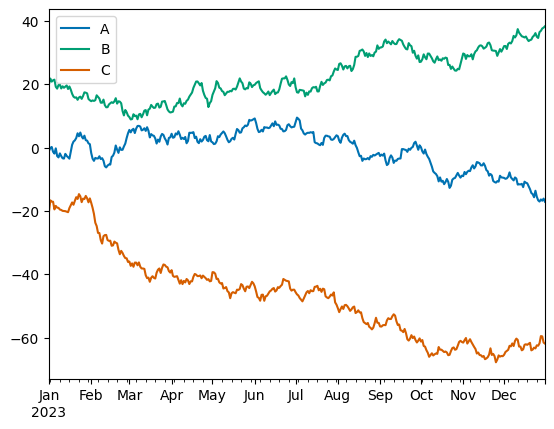

In [ ]:
df.plot()

<Axes: xlabel='A', ylabel='C'>

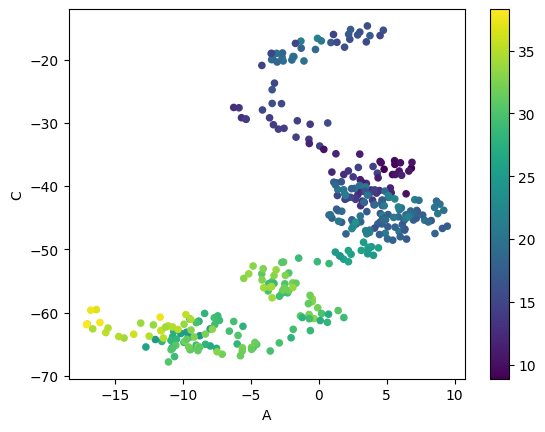

In [ ]:
df.plot.scatter('A', 'C', c=df['B'], colormap='viridis')

<Axes: xlabel='A', ylabel='B'>

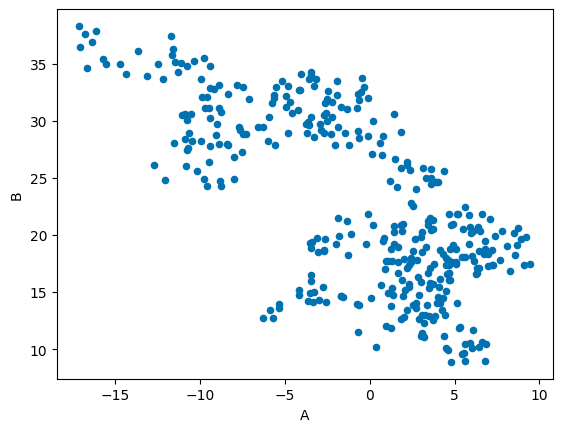

In [ ]:
df.plot('A', 'B', kind='scatter')

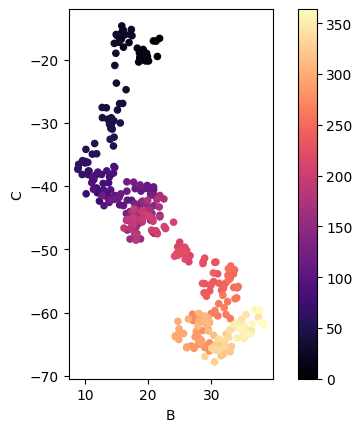

In [ ]:
ax = df.plot.scatter('B', 'C', c=np.arange(len(df)), colormap='magma')
ax.set_aspect('equal')

<Axes: ylabel='Frequency'>

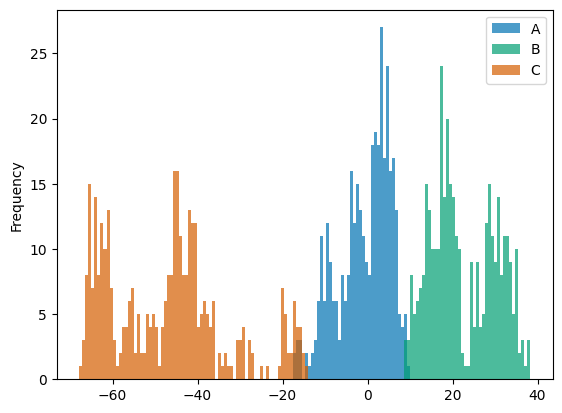

In [ ]:
df.plot.hist(alpha=0.7, bins=150)

<Axes: ylabel='Density'>

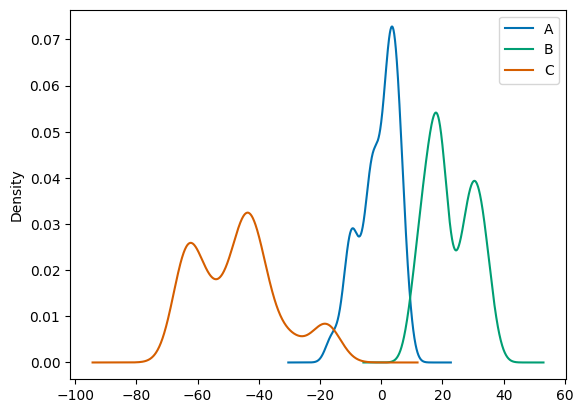

In [ ]:
df.plot.kde()

In [ ]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
df = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
df

,a,b
2 June 2013,57,30
"Aug 29, 2014",98,86
2015-06-26,93,48
7/12/16,72,48


In [ ]:
df.index = pd.to_datetime(df.index)
df

,a,b
2013-06-02,57,30
2014-08-29,98,86
2015-06-26,93,48
2016-07-12,72,48


Hometask

# Hometasks


**Question 1**

*   Load the energy data from the file Energy Indicators.xls.

It is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013.
*   It should be put into a DataFrame with the variable name of "energy"
*   Make sure to exclude the footer and header information from the datafile.
*   The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:
```
# ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
```
*   Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule).
*   For all countries which have missing data (e.g. data with ...) make sure this is reflected as np.NaN values.
*   Rename the following list of countries (for use in later questions):
 *   Republic of Korea: South Korea,
 *   United States of America: United States,
 *   United Kingdom of Great Britain and Northern Ireland: United Kingdom,
 *   China, Hong Kong Special Administrative Region: Hong Kong
*   There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g.:
 *   Bolivia (Plurinational State of) should be Bolivia,
 *   Switzerland17 should be Switzerland.
*   Next, load the GDP data from the file "world_bank.csv".

It is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame "GDP"

*   Make sure to skip the header, and rename the following list of countries:

 *   Korea, Rep.: South Korea,
 *   Iran, Islamic Rep.: Iran,
 *   Hong Kong SAR, China: Hong Kong

*   Finally, load the "Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology". It ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame "ScimEn"

*   Join the three datasets: Energy, GDP, and ScimEn into a new dataset (using the intersection of country names). Use only the 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

*   The index of this DataFrame should be the name of the country, and the columns should be

```
# ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', 2012', '2013', '2014', '2015']
```

Function "answer_one" should return the resulted DataFrame (20 columns and 15 entries)


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_name = 'Energy Indicators.xls'

df = pd.read_excel(file_name, skiprows=17, skipfooter=38)

energy = pd.DataFrame(df)
energy = energy.drop(columns=['Unnamed: 0', 'Unnamed: 1'])
energy

,Unnamed: 2,Petajoules,Gigajoules,%
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


In [ ]:
energy.rename(columns={'Unnamed: 2': 'Country', 'Petajoules': 'Energy Supply', 'Gigajoules': 'Energy Supply per Capita', '%': '% Renewable'}, inplace=True)
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


In [ ]:
energy.replace('...', np.NaN, inplace=True)

In [ ]:
energy['Energy Supply'] *= 1000000
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28.0,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
224,Yemen,3.440000e+08,13.0,0.000000
225,Zambia,4.000000e+08,26.0,99.714670


In [ ]:
energy['Country'].replace('[0-9]+', '', regex=True, inplace=True)
energy[190:200]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
190,Spain,4.923000e+09,106.0,37.96859
191,Sri Lanka,3.880000e+08,19.0,59.57323
192,State of Palestine,6.100000e+07,14.0,0.00000
193,Sudan,6.080000e+08,16.0,78.41048
194,Suriname,3.400000e+07,65.0,22.02381
195,Swaziland,4.900000e+07,39.0,40.67797
196,Sweden,2.044000e+09,212.0,46.59846
197,Switzerland,1.113000e+09,136.0,57.74548
198,Syrian Arab Republic,5.420000e+08,28.0,11.56827
199,Tajikistan,1.060000e+08,13.0,99.74292


In [ ]:
energy['Country'].replace({'Republic of Korea': 'South Korea', 'United States of America': 'United States',
                           'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                           'China, Hong Kong Special Administrative Region': 'Hong Kong'}, inplace=True)
energy[160:200]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
160,Poland,4.121000e+09,107.0,5.537899
161,Portugal,8.990000e+08,86.0,53.340300
162,Puerto Rico,5.600000e+07,15.0,1.080808
163,Qatar,1.396000e+09,664.0,0.000000
164,South Korea,1.100700e+10,221.0,2.279353
165,Republic of Moldova,9.300000e+07,23.0,5.082873
166,Réunion,5.900000e+07,70.0,28.297190
167,Romania,1.339000e+09,68.0,34.384500
168,Russian Federation,3.070900e+10,214.0,17.288680
169,Rwanda,9.500000e+07,9.0,35.835350


In [ ]:
file_name = 'world_bank.csv'
df = pd.read_csv(file_name, on_bad_lines='skip', skiprows=3)
gdp = pd.DataFrame(df)
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074393e+09,6.295845e+09,6.682674e+09,7.180769e+09,7.878763e+09,7.899741e+09,7.717143e+09,9.412034e+09,9.429156e+09,NaN
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.041589e+11,3.885312e+11,3.376196e+11,4.190156e+11,4.058697e+11,NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.214765e+10,2.978445e+10,NaN


In [ ]:
gdp['Country Name'].replace({'Korea, Rep.': 'South Korea', 'Iran, Islamic Rep.': 'Iran',
                             'Hong Kong SAR, China': 'Hong Kong'}, inplace=True)
gdp.rename(columns={'Country Name': 'Country'}, inplace=True)
cols = ['Country', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
gdp = gdp[cols]
gdp

,Country,2016,2017,2018,2019,2020,2021,2022
0,Aruba,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
1,Africa Eastern and Southern,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12
2,Afghanistan,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
3,Africa Western and Central,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11
4,Angola,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11
...,...,...,...,...,...,...,...,...
261,Kosovo,6.682674e+09,7.180769e+09,7.878763e+09,7.899741e+09,7.717143e+09,9.412034e+09,9.429156e+09
262,"Yemen, Rep.",3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN
263,South Africa,3.235855e+11,3.814488e+11,4.041589e+11,3.885312e+11,3.376196e+11,4.190156e+11,4.058697e+11
264,Zambia,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.214765e+10,2.978445e+10


In [ ]:
file_name = 'ScimEm.xlsx'
df = pd.read_excel(file_name)
scimEm = pd.DataFrame(df)
scimEm = scimEm[scimEm['Rank'] <= 15]
cols = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
        'Citations per document', 'H index']
scimEm = scimEm[cols]
scimEm

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,China,1,360468,358777,3947871,2705774,10.95,308
1,United States,2,199442,195042,3068926,881789,15.39,422
2,India,3,76103,74167,760964,280893,10.00,217
3,Japan,4,56249,55680,633294,136132,11.26,217
4,United Kingdom,5,52572,51156,909276,151672,17.30,267
5,Germany,6,47781,46767,641717,133693,13.43,230
6,Russian Federation,7,43567,43290,175721,79765,4.03,103
7,Canada,8,39036,38276,787010,125333,20.16,263
8,Italy,9,35991,34424,529459,123042,14.71,192
9,South Korea,10,35294,35005,503147,87529,14.26,182


In [ ]:
result = pd.merge(pd.merge(energy, gdp, how='inner', on='Country'), scimEm, how='inner', on='Country')
result.set_index('Rank', inplace=True)
result.shape

(14, 17)

# Other questions

In [ ]:
def answer_one():
  import numpy as np
  import pandas as pd
  result = pd.merge(pd.merge(energy(), gdp(), how='inner', on='Country'), scimEm(), how='inner', on='Country')
  result.set_index('Rank', inplace=True)
  return result



def energy():
  file_name = 'Energy Indicators.xls'
  df = pd.read_excel(file_name, skiprows=17, skipfooter=38)
  energy = pd.DataFrame(df)
  energy = energy.drop(columns=['Unnamed: 0', 'Unnamed: 1'])
  energy.rename(columns={'Unnamed: 2': 'Country', 'Petajoules': 'Energy Supply',
                         'Gigajoules': 'Energy Supply per Capita', '%': '% Renewable'}, inplace=True)
  energy.replace('...', np.NaN, inplace=True)
  energy['Energy Supply'] *= 1000000
  energy['Country'].replace('[0-9]+', '', regex=True, inplace=True)
  energy['Country'].replace({'Republic of Korea': 'South Korea', 'United States of America': 'United States',
                           'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                           'China, Hong Kong Special Administrative Region': 'Hong Kong'}, inplace=True)
  return energy

def gdp():
  file_name = 'world_bank.csv'
  df = pd.read_csv(file_name, on_bad_lines='skip', skiprows=3)
  gdp = pd.DataFrame(df)
  gdp['Country Name'].replace({'Korea, Rep.': 'South Korea', 'Iran, Islamic Rep.': 'Iran',
                             'Hong Kong SAR, China': 'Hong Kong'}, inplace=True)
  gdp.rename(columns={'Country Name': 'Country'}, inplace=True)
  cols = ['Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
  gdp = gdp[cols]
  return gdp

def scimEm():
  file_name = 'ScimEm.xlsx'
  df = pd.read_excel(file_name)
  scimEm = pd.DataFrame(df)
  scimEm = scimEm[scimEm['Rank'] <= 15]
  cols = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
        'Citations per document', 'H index']
  scimEm = scimEm[cols]
  return scimEm

answer_one()

,Country,Energy Supply,Energy Supply per Capita,% Renewable,2012,2013,2014,2015,2016,2017,...,2019,2020,2021,2022,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Rank,,,,,,,,,,,,,,,,,,,,,
14,Australia,5.386000e+09,231.0,11.810810,1.546953e+12,1.576330e+12,1.467590e+12,1.350580e+12,1.206563e+12,1.326467e+12,...,1.392219e+12,1.326945e+12,1.552703e+12,1.675419e+12,25906,25237,495278,72475,19.12,212
15,Brazil,1.214900e+10,59.0,69.648030,2.465228e+12,2.472819e+12,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,...,1.873288e+12,1.476107e+12,1.649623e+12,1.920096e+12,25887,25493,260540,60487,10.06,145
8,Canada,1.043100e+10,296.0,61.945430,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,...,1.743725e+12,1.647598e+12,2.001487e+12,2.139840e+12,39036,38276,787010,125333,20.16,263
1,China,1.271910e+11,93.0,19.754910,8.532186e+12,9.570471e+12,1.047562e+13,1.106157e+13,1.123331e+13,1.231049e+13,...,1.427997e+13,1.468774e+13,1.782046e+13,1.796317e+13,360468,358777,3947871,2705774,10.95,308
12,France,1.059700e+10,166.0,17.020280,2.683672e+12,2.811877e+12,2.855964e+12,2.439189e+12,2.472964e+12,2.595151e+12,...,2.728870e+12,2.639009e+12,2.957880e+12,2.782905e+12,29351,28759,471469,79375,16.06,205
6,Germany,1.326100e+10,165.0,17.901530,3.527143e+12,3.733805e+12,3.889093e+12,3.357586e+12,3.469853e+12,3.690849e+12,...,3.888226e+12,3.889669e+12,4.259935e+12,4.072192e+12,47781,46767,641717,133693,13.43,230
3,India,3.319500e+10,26.0,14.969080,1.827638e+12,1.856721e+12,2.039126e+12,2.103588e+12,2.294797e+12,2.651474e+12,...,2.835606e+12,2.671595e+12,3.150307e+12,3.385090e+12,76103,74167,760964,280893,10.00,217
9,Italy,6.530000e+09,109.0,33.667230,2.086958e+12,2.141924e+12,2.162010e+12,1.836638e+12,1.877072e+12,1.961796e+12,...,2.011302e+12,1.897210e+12,2.114356e+12,2.010432e+12,35991,34424,529459,123042,14.71,192
4,Japan,1.898400e+10,149.0,10.232820,6.272363e+12,5.212328e+12,4.896994e+12,4.444931e+12,5.003678e+12,4.930837e+12,...,5.117994e+12,5.048790e+12,5.005537e+12,4.231141e+12,56249,55680,633294,136132,11.26,217


**Q2**

What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

This function should return a Series named avgGDP with 15 countries and their average GDP sorted in descending order.



In [ ]:
def answer_two():
    Top15 = answer_one()
    cols = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
    Top15['avg'] = answer_one()[cols].mean(axis=1)
    return Top15[['Country', 'avg']].sort_values('avg', ascending=False)

answer_two()


,Country,avg
Rank,,
2,United States,1.988896e+13
1,China,1.289363e+13
4,Japan,5.018679e+12
6,Germany,3.795709e+12
5,United Kingdom,2.864441e+12
12,France,2.705313e+12
3,India,2.501716e+12
9,Italy,2.017421e+12
15,Brazil,1.990142e+12


**Q3**

By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

This function should return a single number.

In [ ]:
def answer_three():
  Top15 = answer_one()
  result = Top15.iloc[5]['2022'] - Top15.iloc[5]['2012']
  return result

answer_three()

545048547304.3496

**Q4**

Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

This function should return a tuple with the name of the country and the ratio.

In [ ]:
def answer_four():
  Top15 = answer_one()
  Top15['SC/C'] = Top15['Self-citations'] / Top15['Citations']
  Top15.sort_values('SC/C', ascending=False, inplace=True)
  return Top15.iloc[0]['Country'], Top15.iloc[0]['SC/C']

answer_four()

('China', 0.6853754846599598)

**Q5**

Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?

This function should return a single string value.

In [ ]:
def answer_five():
  Top15 = answer_one()
  Top15['Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
  Top15.sort_values('Population', ascending=False, inplace=True)
  return Top15.iloc[2]['Country']

answer_five()

'United States'

**Q6**

Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation).

This function should return a single number.

In [ ]:
def answer_six():
  Top15 = answer_one()
  Top15['Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
  Top15['Citable documents per person'] = Top15['Citable documents'] / Top15['Population']
  result = Top15['Citable documents per person'].corr(Top15['Energy Supply per Capita'], method='pearson')
  return result

answer_six()

0.7058314702454702

**Q7**

Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.



```
 ContinentDict  = {'China':'Asia',
                  'United States':'North America',
                  'Japan':'Asia',
                  'United Kingdom':'Europe',
                  'Russian Federation':'Europe',
                  'Canada':'North America',
                  'Germany':'Europe',
                  'India':'Asia',
                  'France':'Europe',
                  'South Korea':'Asia',
                  'Italy':'Europe',
                  'Spain':'Europe',
                  'Iran':'Asia',
                  'Australia':'Australia',
                  'Brazil':'South America'}
```


This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`

In [ ]:
def answer_seven():
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia',
                  'United States':'North America',
                  'Japan':'Asia',
                  'United Kingdom':'Europe',
                  'Russian Federation':'Europe',
                  'Canada':'North America',
                  'Germany':'Europe',
                  'India':'Asia',
                  'France':'Europe',
                  'South Korea':'Asia',
                  'Italy':'Europe',
                  'Spain':'Europe',
                  'Iran':'Asia',
                  'Australia':'Australia',
                  'Brazil':'South America'}
    #df_groups = pd.DataFrame(columns=['size', 'sum', 'mean', 'std'])
    data = {'Country': list(ContinentDict.keys()),
            'Continent': list(ContinentDict.values())}
    df = pd.DataFrame(data)
    df['Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    dictionary = df.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])
    return dictionary


answer_seven()

,size,sum,mean,std
Continent,,,,
Asia,5,5.848610e+08,1.462152e+08,1.205825e+08
Australia,1,4.644340e+07,4.644340e+07,NaN
Europe,6,1.569555e+09,3.139110e+08,5.393875e+08
North America,2,1.431516e+09,7.157581e+08,9.219076e+08
South America,1,2.331602e+07,2.331602e+07,NaN
